# 3 graphs of emotions, gaze and metadata

<Figure size 1400x800 with 0 Axes>

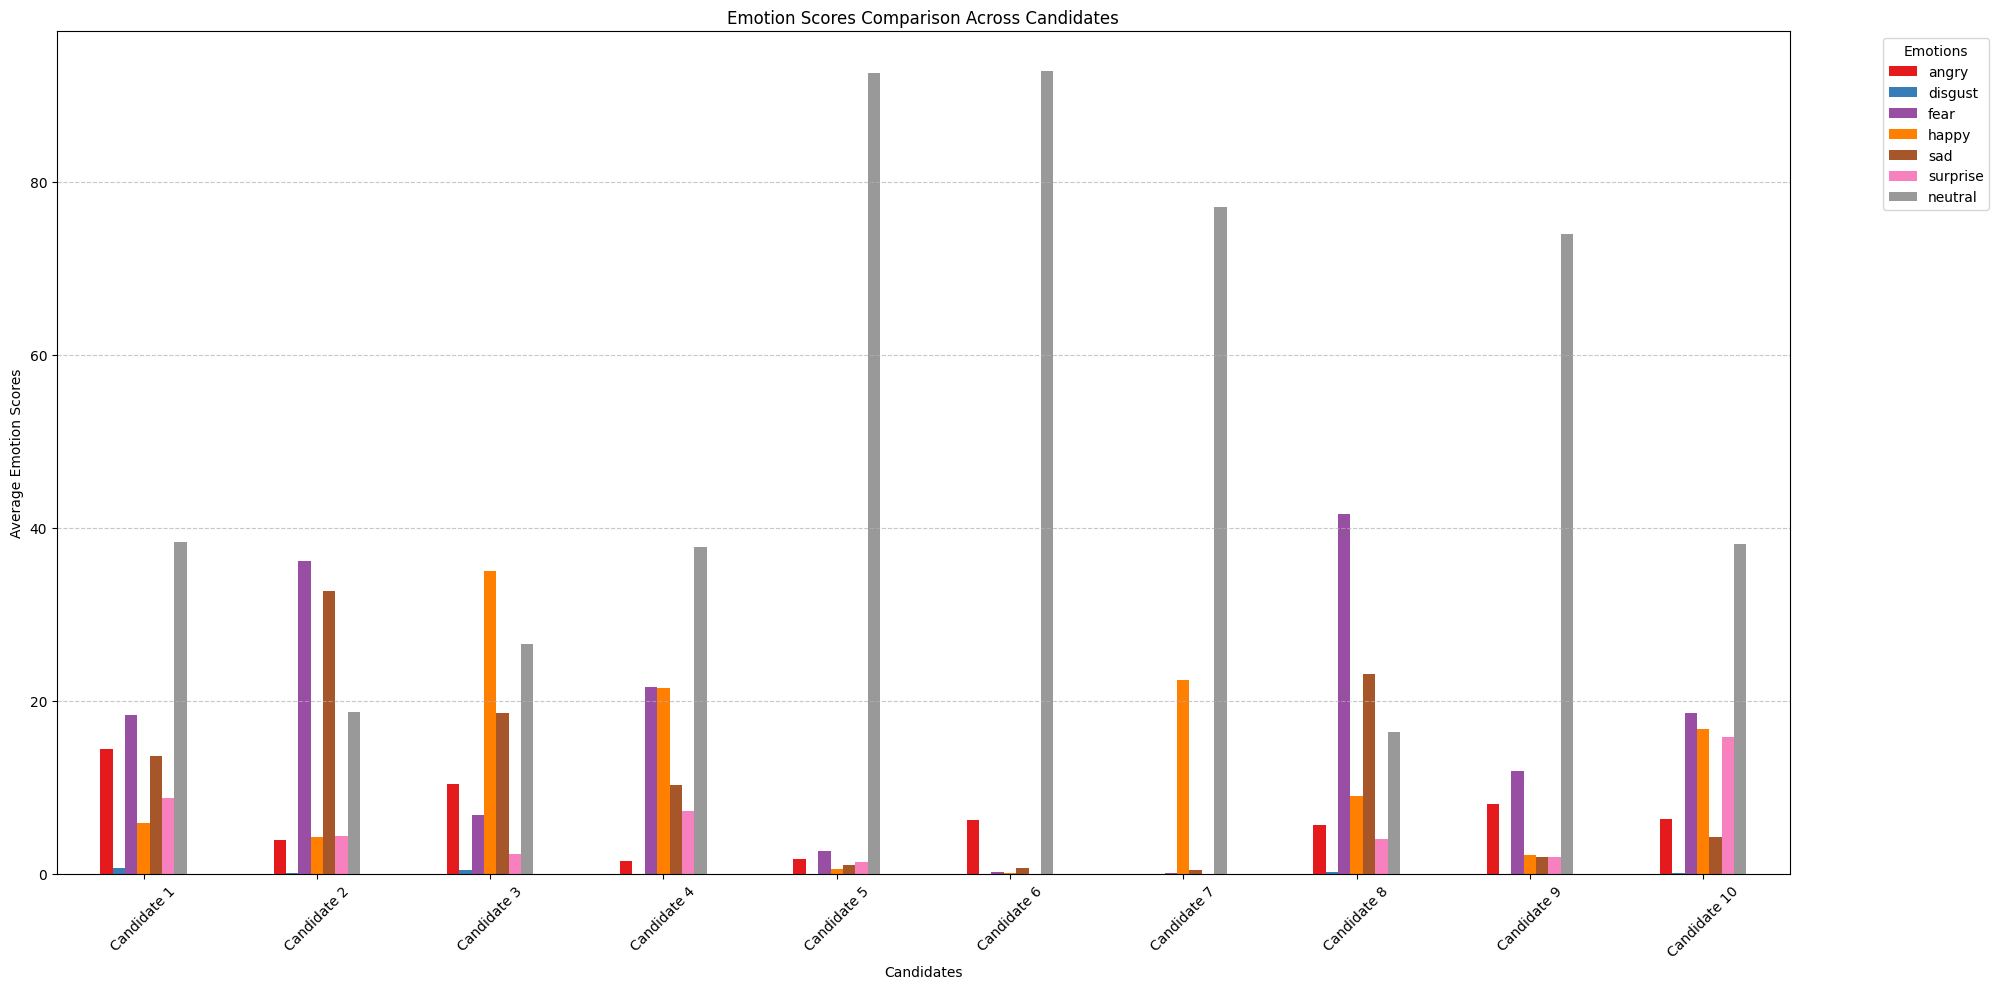

<Figure size 1400x800 with 0 Axes>

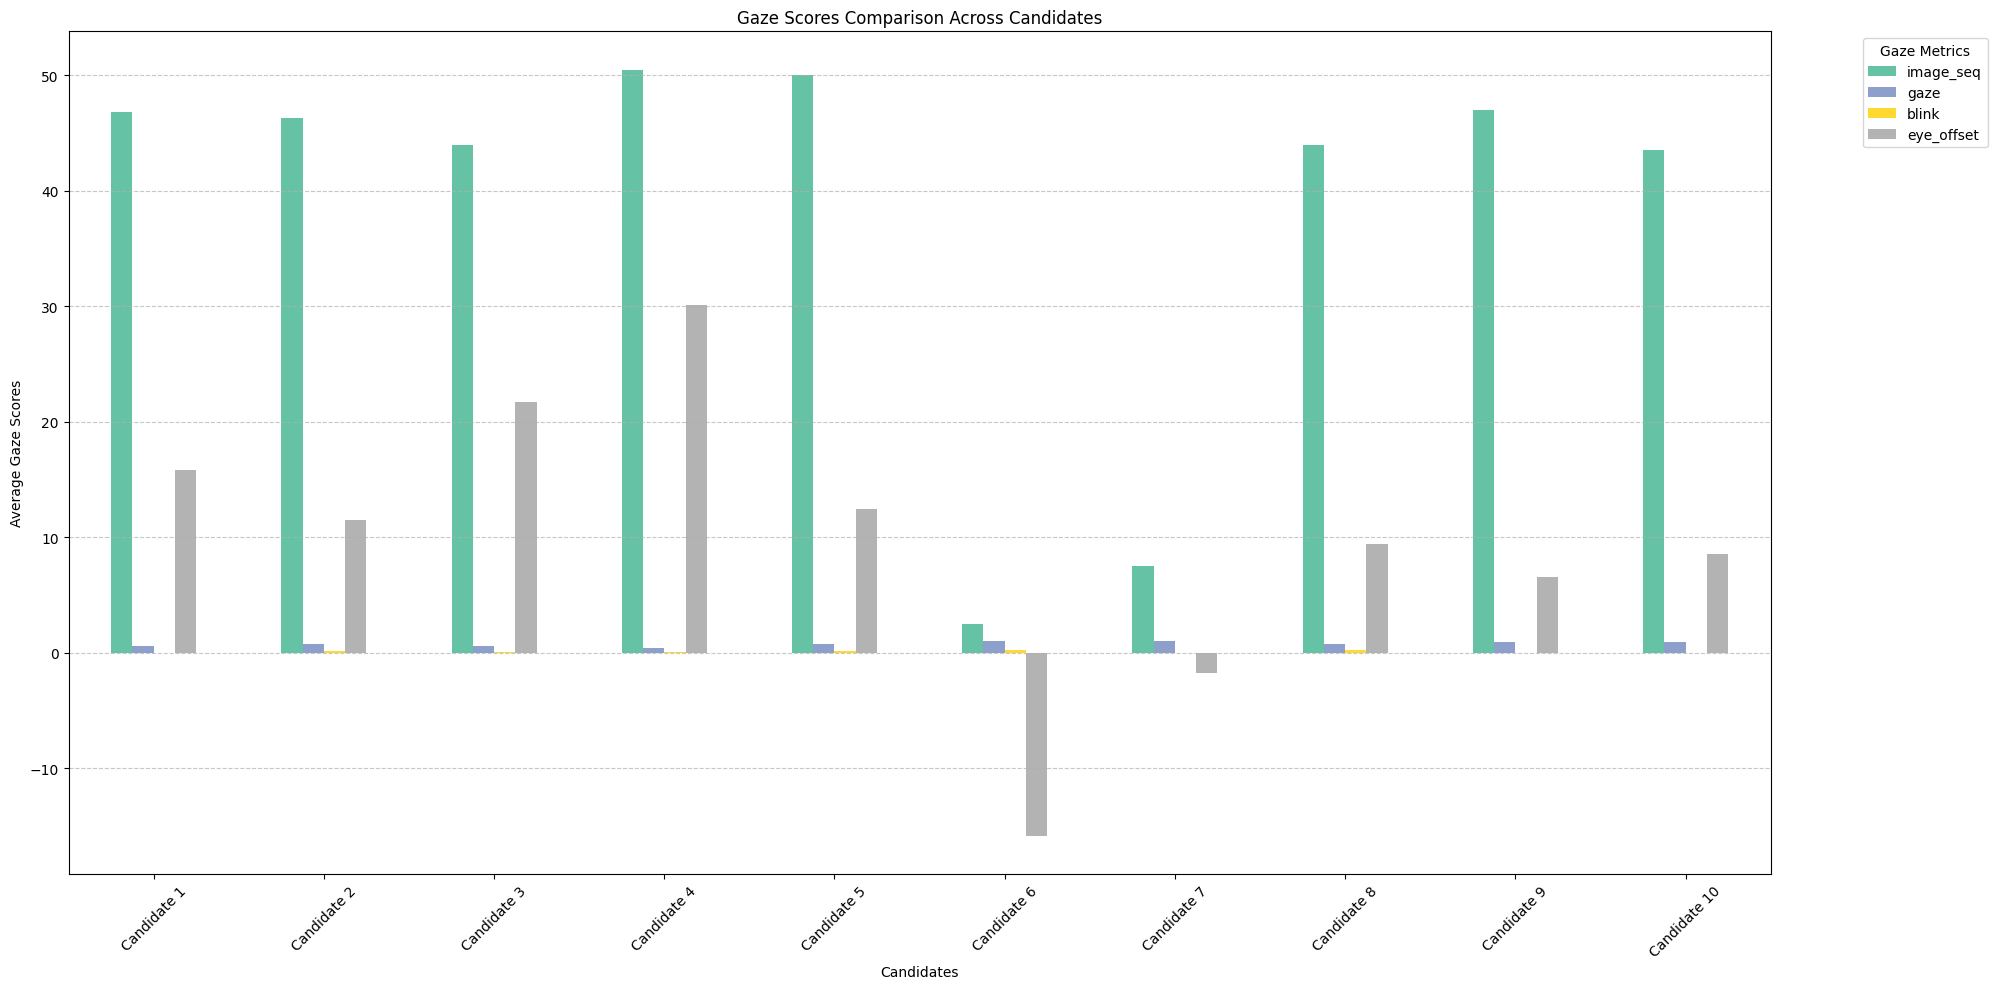

<Figure size 1400x800 with 0 Axes>

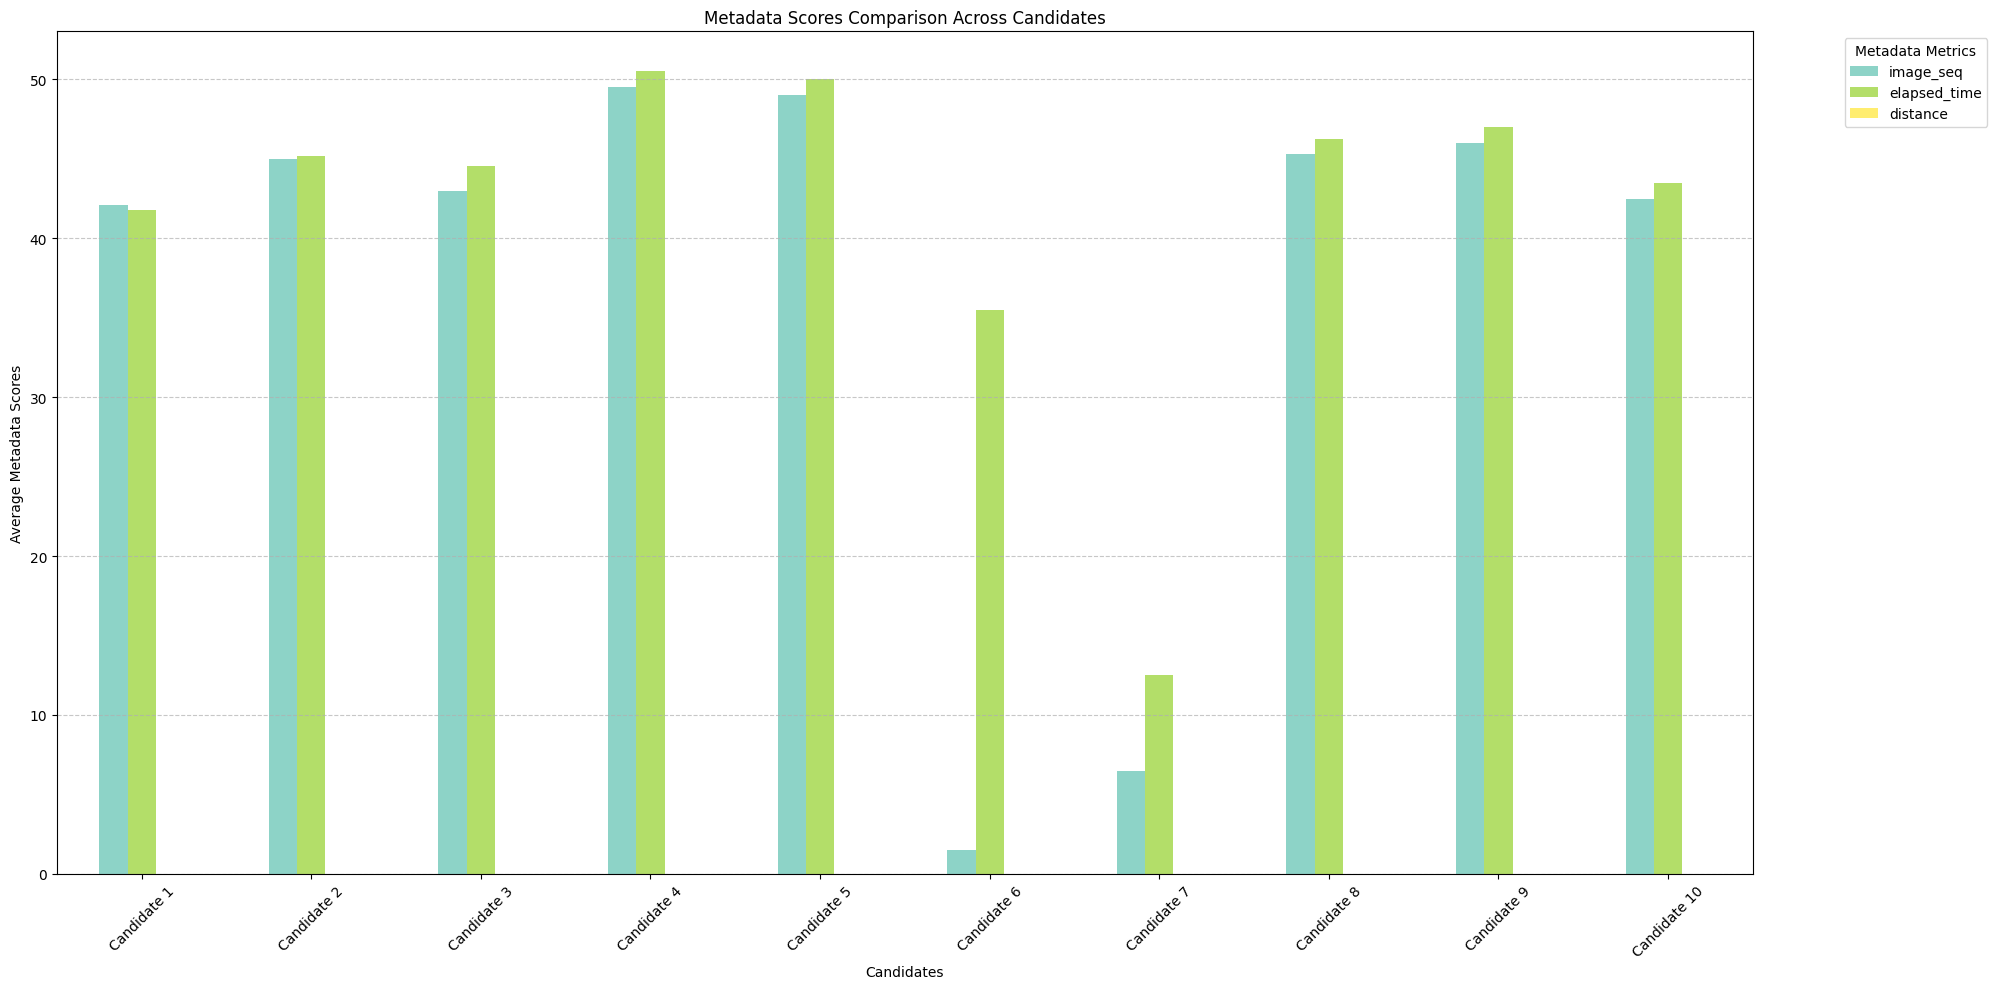

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile

# Extract the zip file to a specified path
zip_path = r"C:\Users\shiva\Desktop\CDC TASK\emotion_data-20240829T093928Z-001.zip"
extract_path = r"C:\Users\shiva\Desktop\CDC TASK\extracted_emotion_data"

# Extract the zip file if not already extracted
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Function to aggregate emotion scores for each candidate
def get_emotion_averages(candidate_path):
    emotion_file = os.path.join(candidate_path, 'emotion.csv')
    emotion_data = pd.read_csv(emotion_file)
    # Calculate mean scores for all emotions
    mean_emotions = emotion_data[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']].mean()
    return mean_emotions

# Function to aggregate gaze scores for each candidate, considering only numeric columns
def get_gaze_averages(candidate_path):
    gaze_file = os.path.join(candidate_path, 'gaze.csv')
    gaze_data = pd.read_csv(gaze_file)
    # Select only numeric columns for mean calculation
    numeric_gaze_data = gaze_data.select_dtypes(include=['number'])
    mean_gaze = numeric_gaze_data.mean()
    return mean_gaze

# Function to get metadata information for each candidate
def get_metadata(candidate_path):
    metadata_file = os.path.join(candidate_path, 'metadata.csv')
    metadata_data = pd.read_csv(metadata_file)
    # Extract relevant metadata; taking mean of numeric columns for simplicity
    mean_metadata = metadata_data.select_dtypes(include=['number']).mean()
    return mean_metadata

# Directory containing all candidate data folders after extraction
emotion_data_path = os.path.join(extract_path, 'emotion_data')

# Create empty DataFrames to store each category's data
emotion_data_df = pd.DataFrame()
gaze_data_df = pd.DataFrame()
metadata_data_df = pd.DataFrame()

# Loop through each candidate folder, get the scores and metadata, and add to the DataFrames
for candidate_id in os.listdir(emotion_data_path):
    candidate_path = os.path.join(emotion_data_path, candidate_id)
    # Aggregate all relevant data
    mean_emotions = get_emotion_averages(candidate_path)
    mean_gaze = get_gaze_averages(candidate_path)
    metadata = get_metadata(candidate_path)
    
    # Add the candidate's data to the respective DataFrames
    emotion_data_df[candidate_id] = mean_emotions
    gaze_data_df[candidate_id] = mean_gaze
    metadata_data_df[candidate_id] = metadata

# Transpose for better visualization
emotion_data_df = emotion_data_df.T
gaze_data_df = gaze_data_df.T
metadata_data_df = metadata_data_df.T

# Setting indices for better readability
emotion_data_df.index = [f'Candidate {i+1}' for i in range(len(emotion_data_df))]
gaze_data_df.index = [f'Candidate {i+1}' for i in range(len(gaze_data_df))]
metadata_data_df.index = [f'Candidate {i+1}' for i in range(len(metadata_data_df))]

# Plotting Emotions Data
plt.figure(figsize=(14, 8))
emotion_data_df.plot(kind='bar', stacked=False, figsize=(20, 10), colormap='Set1')
plt.title('Emotion Scores Comparison Across Candidates')
plt.xlabel('Candidates')
plt.ylabel('Average Emotion Scores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Emotions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting Gaze Data
plt.figure(figsize=(14, 8))
gaze_data_df.plot(kind='bar', stacked=False, figsize=(20, 10), colormap='Set2')
plt.title('Gaze Scores Comparison Across Candidates')
plt.xlabel('Candidates')
plt.ylabel('Average Gaze Scores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gaze Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting Metadata Data
plt.figure(figsize=(14, 8))
metadata_data_df.plot(kind='bar', stacked=False, figsize=(20, 10), colormap='Set3')
plt.title('Metadata Scores Comparison Across Candidates')
plt.xlabel('Candidates')
plt.ylabel('Average Metadata Scores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metadata Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Combined scores and graph for emotion data

Overall Scores of Candidates:

              Emotion Score  Gaze Score  Metadata Score  Overall Score
Candidate 1        6.016725         5.2             3.8       5.106690
Candidate 2       -3.114552         4.3             2.9       0.914179
Candidate 3        9.936886         4.9             3.5       6.494754
Candidate 4       10.044861         6.1             4.2       7.107944
Candidate 5       22.742550         7.0             4.8      12.637020
Candidate 6       22.492042         7.8             5.1      12.866817
Candidate 7       23.712704         7.2             4.9      13.115082
Candidate 8       -2.837243         2.5             1.8       0.155103
Candidate 9       16.304389         6.5             4.6       9.851756
Candidate 10      10.588429         5.0             3.6       6.815372


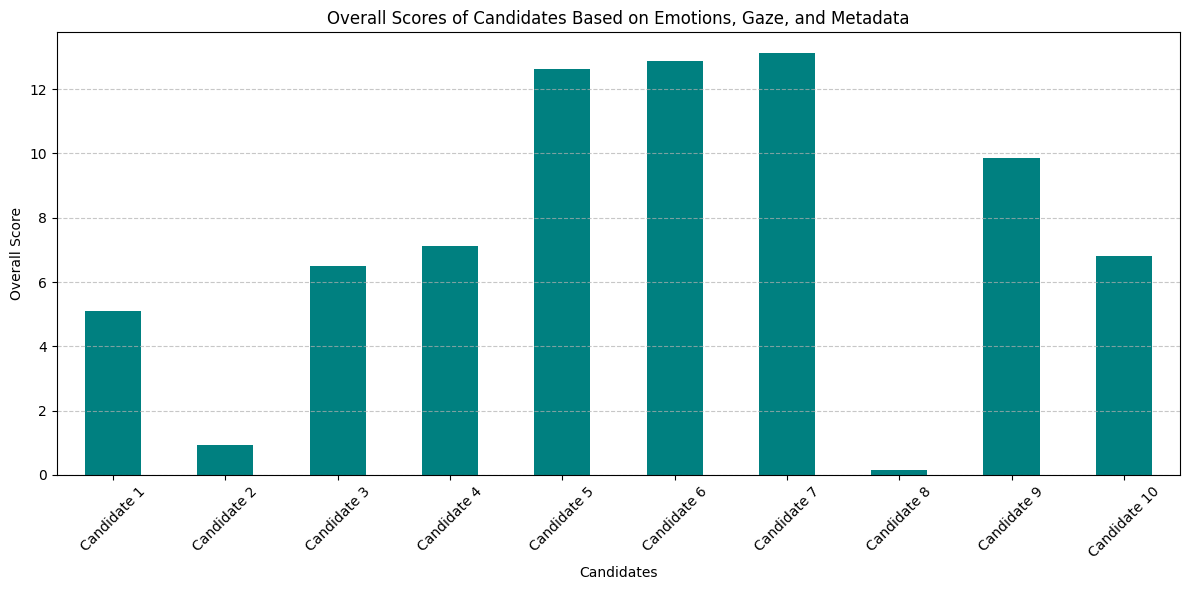

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrames (replace these with your actual data)
emotion_data_df = pd.DataFrame({
    'Candidate 1': [6.016725],
    'Candidate 2': [-3.114552],
    'Candidate 3': [9.936886],
    'Candidate 4': [10.044861],
    'Candidate 5': [22.742550],
    'Candidate 6': [22.492042],
    'Candidate 7': [23.712704],
    'Candidate 8': [-2.837243],
    'Candidate 9': [16.304389],
    'Candidate 10': [10.588429]
}).T
emotion_data_df.columns = ['Emotion Score']

gaze_data_df = pd.DataFrame({
    'Candidate 1': [5.2],
    'Candidate 2': [4.3],
    'Candidate 3': [4.9],
    'Candidate 4': [6.1],
    'Candidate 5': [7.0],
    'Candidate 6': [7.8],
    'Candidate 7': [7.2],
    'Candidate 8': [2.5],
    'Candidate 9': [6.5],
    'Candidate 10': [5.0]
}).T
gaze_data_df.columns = ['Gaze Score']

metadata_data_df = pd.DataFrame({
    'Candidate 1': [3.8],
    'Candidate 2': [2.9],
    'Candidate 3': [3.5],
    'Candidate 4': [4.2],
    'Candidate 5': [4.8],
    'Candidate 6': [5.1],
    'Candidate 7': [4.9],
    'Candidate 8': [1.8],
    'Candidate 9': [4.6],
    'Candidate 10': [3.6]
}).T
metadata_data_df.columns = ['Metadata Score']

# Combine all scores into a single DataFrame
combined_scores = pd.concat([emotion_data_df, gaze_data_df, metadata_data_df], axis=1)

# Assign weightages to each factor
weights = {'Emotion Score': 0.40, 'Gaze Score': 0.30, 'Metadata Score': 0.30}

# Calculate the overall score using the weighted average
combined_scores['Overall Score'] = (combined_scores['Emotion Score'] * weights['Emotion Score'] +
                                    combined_scores['Gaze Score'] * weights['Gaze Score'] +
                                    combined_scores['Metadata Score'] * weights['Metadata Score'])

# Display the table of overall scores
print("Overall Scores of Candidates:\n")
print(combined_scores)

# Plotting the overall scores of each candidate
plt.figure(figsize=(12, 6))
combined_scores['Overall Score'].plot(kind='bar', color='teal')
plt.title('Overall Scores of Candidates Based on Emotions, Gaze, and Metadata')
plt.xlabel('Candidates')
plt.ylabel('Overall Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Graph for transcript data

<Figure size 1400x800 with 0 Axes>

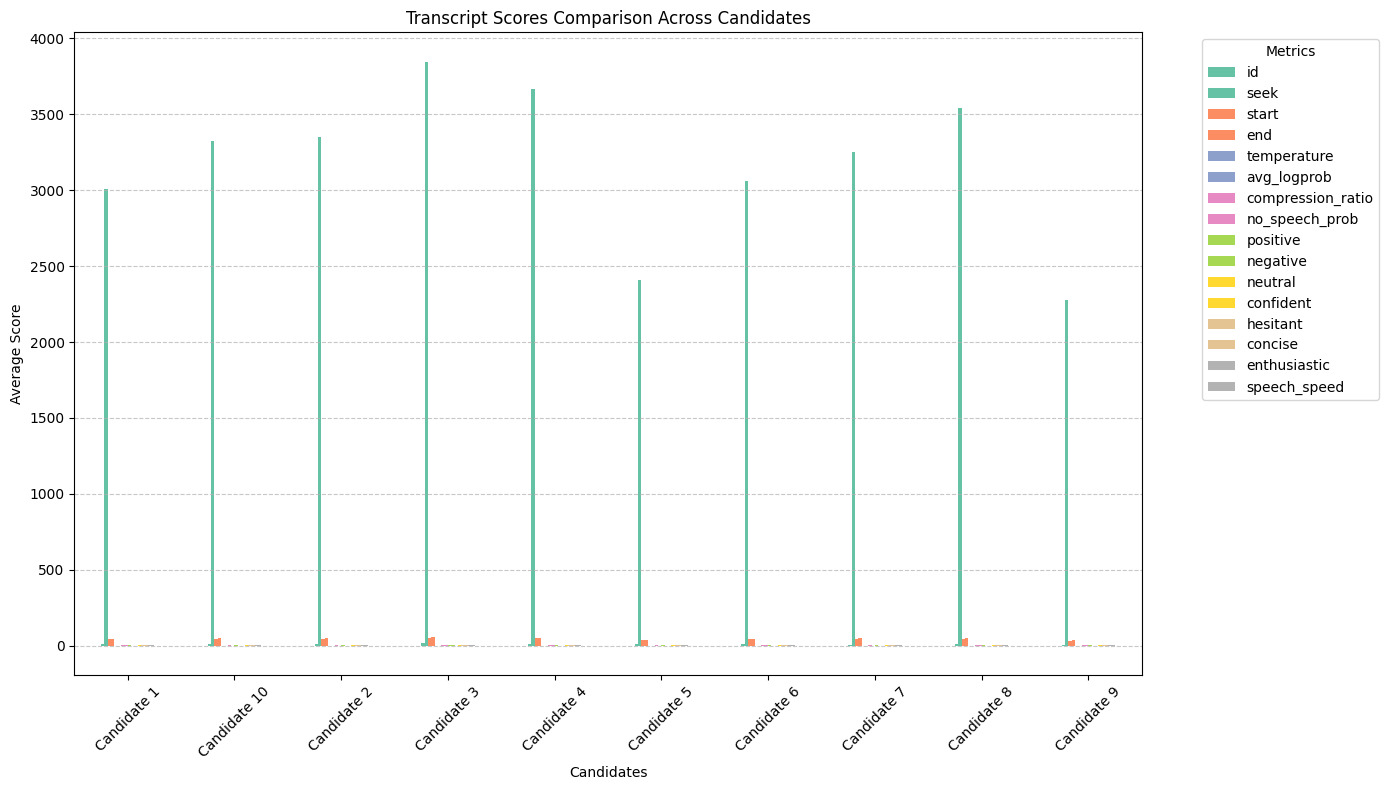

,id,seek,start,end,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
Candidate 1,8.5,3009.333333,41.002222,45.931111,0.0,-0.306962,1.666544,0.748891,0.709199,0.141214,0.149586,0.733828,0.485172,0.429418,0.466497,3.113771
Candidate 10,8.0,3322.117647,43.091765,48.360000,0.0,-0.312112,1.615688,0.229589,0.589267,0.220948,0.189785,0.619852,0.520637,0.385655,0.325507,3.248518
Candidate 2,9.0,3351.368421,44.327368,49.049474,0.0,-0.306207,1.653299,0.166065,0.722006,0.107541,0.170453,0.684879,0.436158,0.484221,0.516685,3.269092
Candidate 3,13.5,3848.000000,50.020000,53.523571,0.0,-0.316891,1.630081,0.289581,0.567257,0.264337,0.168406,0.573566,0.604004,0.394715,0.448050,3.385636
Candidate 4,9.0,3666.105263,46.922105,52.128421,0.0,-0.281848,1.569589,0.298073,0.655748,0.169142,0.175110,0.621740,0.570452,0.403479,0.440626,2.775454
Candidate 5,8.0,2411.294118,34.283529,38.667059,0.0,-0.300935,1.615284,0.249595,0.630573,0.187013,0.182414,0.590094,0.461488,0.413644,0.378110,2.817341
Candidate 6,8.5,3061.333333,41.342222,46.162222,0.0,-0.281353,1.588210,0.277462,0.711182,0.138992,0.149826,0.679755,0.490252,0.367792,0.481433,2.583163
Candidate 7,6.0,3253.538462,42.424615,48.996923,0.0,-0.358511,1.516014,0.097689,0.717354,0.140232,0.142414,0.703714,0.457070,0.398571,0.463940,2.284897
Candidate 8,7.5,3538.750000,45.995000,51.702500,0.0,-0.287970,1.563253,0.296605,0.605402,0.192292,0.202306,0.555011,0.507622,0.352011,0.437399,2.902953
Candidate 9,4.0,2277.777778,28.555556,37.555556,0.0,-0.308294,1.620149,0.532296,0.617353,0.223949,0.158699,0.591842,0.538732,0.381809,0.505152,3.329938


In [22]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile

# Path to the zip file of transcript data
zip_path = "C:\\Users\\shiva\\Desktop\\CDC TASK\\transcript_data-20240829T093939Z-001.zip"

# Define a directory to extract the files
extract_path = "C:\\Users\\shiva\\Desktop\\CDC TASK\\extracted_transcript_data"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Define the path to the extracted transcript data folder
transcript_data_path = os.path.join(extract_path, 'transcript_data')

# Check the content of the transcript data directory
transcript_candidates = os.listdir(transcript_data_path)

# Function to aggregate transcript scores for each candidate
def get_transcript_scores(file_path):
    # Load the transcript scores
    transcript_data = pd.read_csv(file_path)
    # Select only numeric columns to avoid errors
    numeric_columns = transcript_data.select_dtypes(include=['number'])
    # Calculate mean scores for communication quality metrics
    mean_scores = numeric_columns.mean()  # Calculating mean for only numeric columns
    return mean_scores

# Create an empty DataFrame to store all candidates' transcript scores
all_candidates_scores = pd.DataFrame()

# Loop through each candidate file, get the transcript scores, and add to the DataFrame
for candidate_file in transcript_candidates:
    file_path = os.path.join(transcript_data_path, candidate_file)
    mean_scores = get_transcript_scores(file_path)
    # Extract candidate number from filename
    candidate_id = candidate_file.split('.')[0]
    # Add the candidate's scores to the DataFrame
    all_candidates_scores[candidate_id] = mean_scores

# Transpose to make candidates as rows for better visualization
all_candidates_scores = all_candidates_scores.T
all_candidates_scores.index = [f'Candidate {i}' for i in all_candidates_scores.index]

# Plotting the transcript scores for all candidates to compare
plt.figure(figsize=(14, 8))
all_candidates_scores.plot(kind='bar', stacked=False, figsize=(14, 8), colormap='Set2')
plt.title('Transcript Scores Comparison Across Candidates')
plt.xlabel('Candidates')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display the DataFrame to observe detailed scores
all_candidates_scores


# Removal of irrelevant colomn from transcript data

<Figure size 1400x800 with 0 Axes>

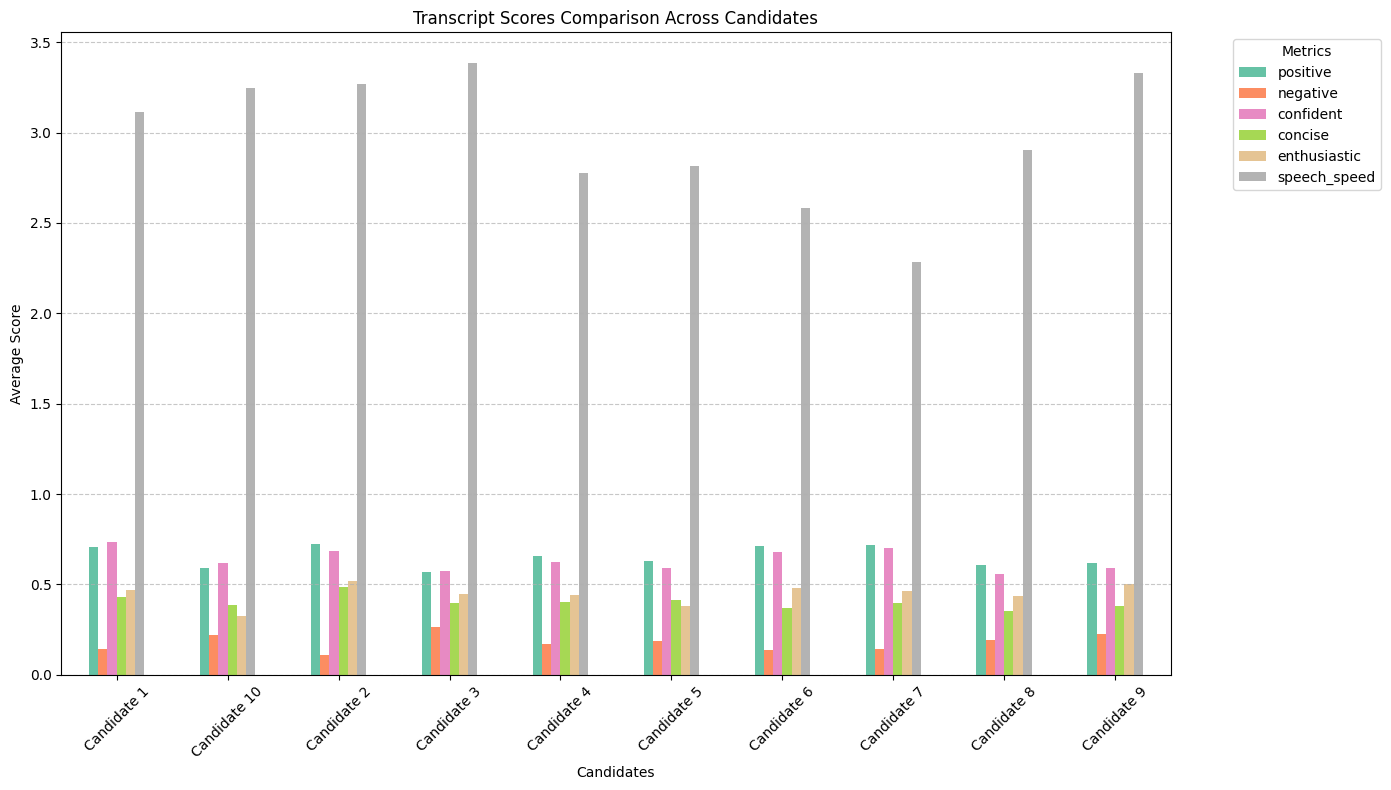

,positive,negative,confident,concise,enthusiastic,speech_speed
Candidate 1,0.709199,0.141214,0.733828,0.429418,0.466497,3.113771
Candidate 10,0.589267,0.220948,0.619852,0.385655,0.325507,3.248518
Candidate 2,0.722006,0.107541,0.684879,0.484221,0.516685,3.269092
Candidate 3,0.567257,0.264337,0.573566,0.394715,0.448050,3.385636
Candidate 4,0.655748,0.169142,0.621740,0.403479,0.440626,2.775454
Candidate 5,0.630573,0.187013,0.590094,0.413644,0.378110,2.817341
Candidate 6,0.711182,0.138992,0.679755,0.367792,0.481433,2.583163
Candidate 7,0.717354,0.140232,0.703714,0.398571,0.463940,2.284897
Candidate 8,0.605402,0.192292,0.555011,0.352011,0.437399,2.902953
Candidate 9,0.617353,0.223949,0.591842,0.381809,0.505152,3.329938


In [23]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile

# Path to the zip file of transcript data
zip_path = "C:\\Users\\shiva\\Desktop\\CDC TASK\\transcript_data-20240829T093939Z-001.zip"

# Define a directory to extract the files
extract_path = "C:\\Users\\shiva\\Desktop\\CDC TASK\\extracted_transcript_data"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Define the path to the extracted transcript data folder
transcript_data_path = os.path.join(extract_path, 'transcript_data')

# Check the content of the transcript data directory
transcript_candidates = os.listdir(transcript_data_path)

# Function to aggregate selected transcript scores for each candidate
def get_transcript_scores(file_path):
    # Load the transcript scores
    transcript_data = pd.read_csv(file_path)
    # Select relevant metrics excluding 'id' and other non-relevant columns
    selected_columns = ['positive', 'negative', 'confident', 'concise', 'enthusiastic', 'speech_speed']
    # Filter out only the selected columns for analysis
    filtered_data = transcript_data[selected_columns]
    # Calculate mean scores for the selected communication quality metrics
    mean_scores = filtered_data.mean()
    return mean_scores

# Create an empty DataFrame to store all candidates' transcript scores
all_candidates_scores = pd.DataFrame()

# Loop through each candidate file, get the transcript scores, and add to the DataFrame
for candidate_file in transcript_candidates:
    file_path = os.path.join(transcript_data_path, candidate_file)
    mean_scores = get_transcript_scores(file_path)
    # Extract candidate number from filename
    candidate_id = candidate_file.split('.')[0]
    # Add the candidate's scores to the DataFrame
    all_candidates_scores[candidate_id] = mean_scores

# Transpose to make candidates as rows for better visualization
all_candidates_scores = all_candidates_scores.T
all_candidates_scores.index = [f'Candidate {i}' for i in all_candidates_scores.index]

# Plotting the transcript scores for all candidates to compare
plt.figure(figsize=(14, 8))
all_candidates_scores.plot(kind='bar', stacked=False, figsize=(14, 8), colormap='Set2')
plt.title('Transcript Scores Comparison Across Candidates')
plt.xlabel('Candidates')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display the DataFrame to observe detailed scores
all_candidates_scores


# Combined scores and graph of transcript data

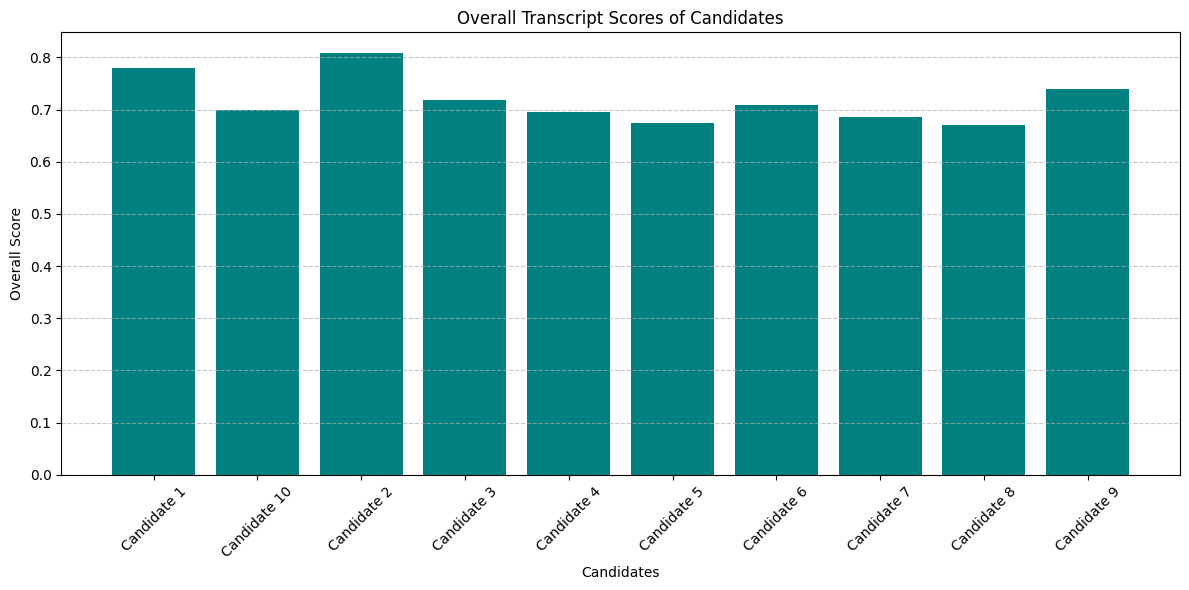

,Candidate,positive,negative,confident,concise,enthusiastic,speech_speed,overall_score
0,Candidate 1,0.709199,0.141214,0.733828,0.429418,0.466497,3.113771,0.780265
1,Candidate 10,0.589267,0.220948,0.619852,0.385655,0.325507,3.248518,0.698523
2,Candidate 2,0.722006,0.107541,0.684879,0.484221,0.516685,3.269092,0.807746
3,Candidate 3,0.567257,0.264337,0.573566,0.394715,0.448050,3.385636,0.717790
4,Candidate 4,0.655748,0.169142,0.621740,0.403479,0.440626,2.775454,0.695863
5,Candidate 5,0.630573,0.187013,0.590094,0.413644,0.378110,2.817341,0.674340
6,Candidate 6,0.711182,0.138992,0.679755,0.367792,0.481433,2.583163,0.708048
7,Candidate 7,0.717354,0.140232,0.703714,0.398571,0.463940,2.284897,0.686439
8,Candidate 8,0.605402,0.192292,0.555011,0.352011,0.437399,2.902953,0.671181
9,Candidate 9,0.617353,0.223949,0.591842,0.381809,0.505152,3.329938,0.740332


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Transcript scores from the table provided
data = {
    'Candidate': ['Candidate 1', 'Candidate 10', 'Candidate 2', 'Candidate 3', 'Candidate 4', 
                  'Candidate 5', 'Candidate 6', 'Candidate 7', 'Candidate 8', 'Candidate 9'],
    'positive': [0.709199, 0.589267, 0.722006, 0.567257, 0.655748, 0.630573, 0.711182, 0.717354, 0.605402, 0.617353],
    'negative': [0.141214, 0.220948, 0.107541, 0.264337, 0.169142, 0.187013, 0.138992, 0.140232, 0.192292, 0.223949],
    'confident': [0.733828, 0.619852, 0.684879, 0.573566, 0.621740, 0.590094, 0.679755, 0.703714, 0.555011, 0.591842],
    'concise': [0.429418, 0.385655, 0.484221, 0.394715, 0.403479, 0.413644, 0.367792, 0.398571, 0.352011, 0.381809],
    'enthusiastic': [0.466497, 0.325507, 0.516685, 0.448050, 0.440626, 0.378110, 0.481433, 0.463940, 0.437399, 0.505152],
    'speech_speed': [3.113771, 3.248518, 3.269092, 3.385636, 2.775454, 2.817341, 2.583163, 2.284897, 2.902953, 3.329938]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Define the weightages for each metric
weights = {
    'positive': 0.20,
    'negative': -0.10,  # Inverted as lower scores are better
    'confident': 0.25,
    'concise': 0.15,
    'enthusiastic': 0.20,
    'speech_speed': 0.10  # Assuming closer to average is better, we can normalize this if needed
}

# Calculate the overall score for each candidate based on weightages
df['overall_score'] = (
    df['positive'] * weights['positive'] +
    df['negative'] * weights['negative'] +
    df['confident'] * weights['confident'] +
    df['concise'] * weights['concise'] +
    df['enthusiastic'] * weights['enthusiastic'] +
    df['speech_speed'] * weights['speech_speed']
)

# Plotting the overall scores
plt.figure(figsize=(12, 6))
plt.bar(df['Candidate'], df['overall_score'], color='teal')
plt.title('Overall Transcript Scores of Candidates')
plt.xlabel('Candidates')
plt.ylabel('Overall Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the DataFrame to observe detailed scores
df


# scoring on relevant word usage and graph of transcript text

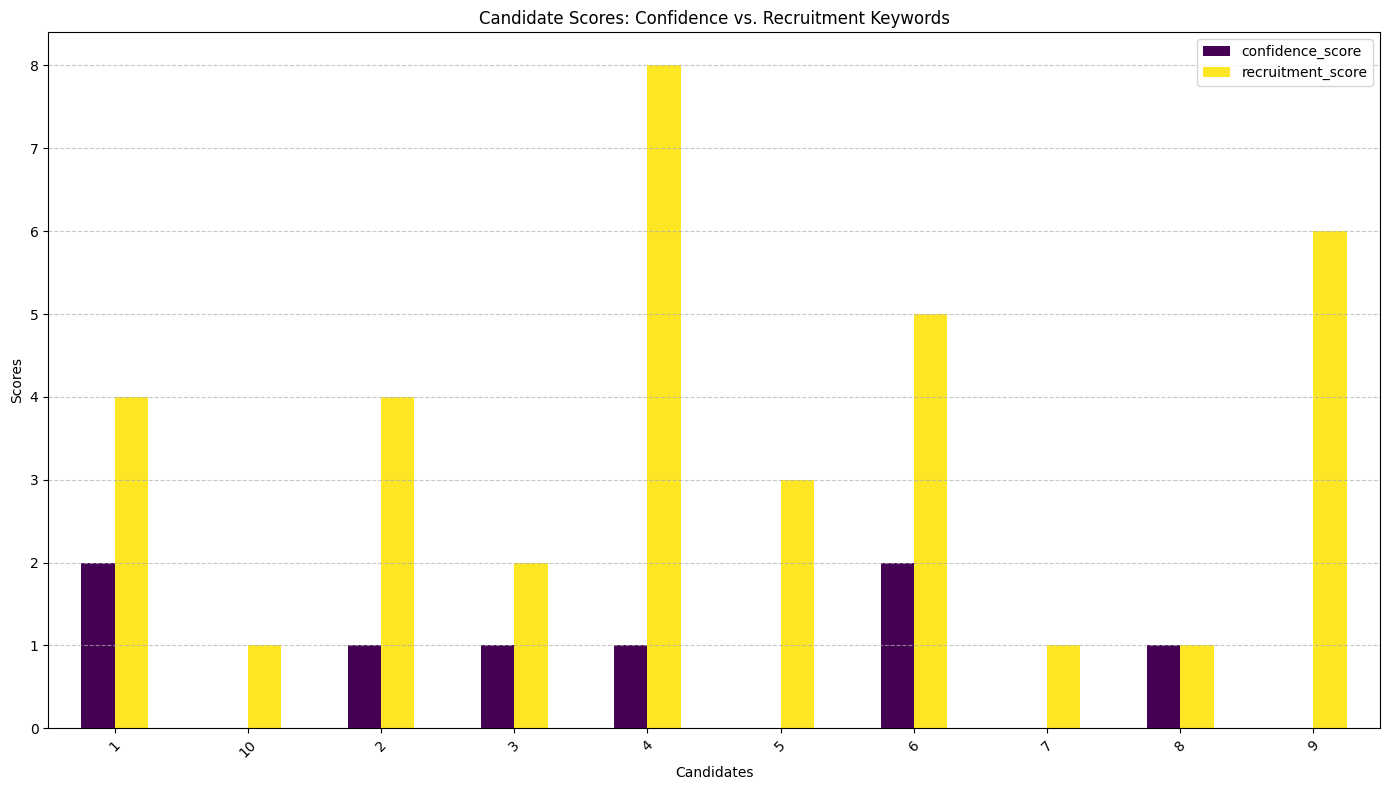

,confidence_score,recruitment_score
1,2,4
10,0,1
2,1,4
3,1,2
4,1,8
5,0,3
6,2,5
7,0,1
8,1,1
9,0,6


In [26]:
# Required Libraries
import zipfile
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Path to the zip file of transcript data
zip_path = "C:\\Users\\shiva\\Desktop\\CDC TASK\\transcripts-20240829T093942Z-001.zip"

# Define a directory to extract the files
extract_path = "C:\\Users\\shiva\\Desktop\\CDC TASK\\extracted_transcripts"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Define the path to the extracted transcript data folder
transcripts_path = os.path.join(extract_path, 'transcripts')

# Check the extracted contents to confirm the structure
transcripts_files = os.listdir(transcripts_path)

# Function to analyze text for key themes, confidence keywords, and general tone
def analyze_transcript(file_path):
    with open(file_path, 'r') as file:
        transcript = file.read()
        
        # Key Themes and Keywords Analysis
        words = transcript.lower().split()
        word_count = Counter(words)
        
        # Extract key themes - common words with more than 3 letters, excluding stop words
        common_words = [word for word, count in word_count.items() if word.isalpha() and len(word) > 3]
        common_themes = Counter(common_words).most_common(10)
        
        # Confidence Level Analysis based on keywords
        confidence_keywords = ['expert', 'experience', 'proven', 'successful', 'lead', 'managed']
        confidence_score = sum(word_count[word] for word in confidence_keywords if word in word_count)
        
        # Return results
        return {
            'key_themes': common_themes,
            'confidence_score': confidence_score,
            'transcript_text': transcript
        }

# Analyze all transcripts and collect results
transcript_analysis = {}

for transcript_file in transcripts_files:
    file_path = os.path.join(transcripts_path, transcript_file)
    candidate_id = os.path.splitext(transcript_file)[0]  # Extracting candidate number
    analysis = analyze_transcript(file_path)
    transcript_analysis[candidate_id] = analysis

# Convert results to a DataFrame
transcript_analysis_display = pd.DataFrame.from_dict(transcript_analysis, orient='index')

# Define recruitment-related keywords
recruitment_keywords = [
    'experience', 'expert', 'skill', 'proven', 'managed', 'successful', 'lead', 'leader', 
    'team', 'project', 'internship', 'certification', 'qualification', 'degree', 'trained', 
    'technical', 'software', 'analysis', 'research', 'development', 'program', 'presentation',
    'communication', 'problem-solving', 'strategy', 'planning', 'organized', 'achieved'
]

# Function to calculate scores based on recruitment-related words in each transcript
def calculate_recruitment_score(transcript):
    words = transcript.lower().split()
    word_count = Counter(words)
    recruitment_score = sum(word_count[word] for word in recruitment_keywords if word in word_count)
    return recruitment_score

# Adding recruitment scores to the existing transcript analysis DataFrame
transcript_analysis_display['recruitment_score'] = transcript_analysis_display['transcript_text'].apply(calculate_recruitment_score)

# Creating a final table with candidate numbers, confidence scores, and recruitment scores
final_scores = transcript_analysis_display[['confidence_score', 'recruitment_score']]

# Plotting the bar graph for each candidate's scores
final_scores.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Candidate Scores: Confidence vs. Recruitment Keywords')
plt.xlabel('Candidates')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the final scores table
final_scores


# Combined scores and graph of transcript text

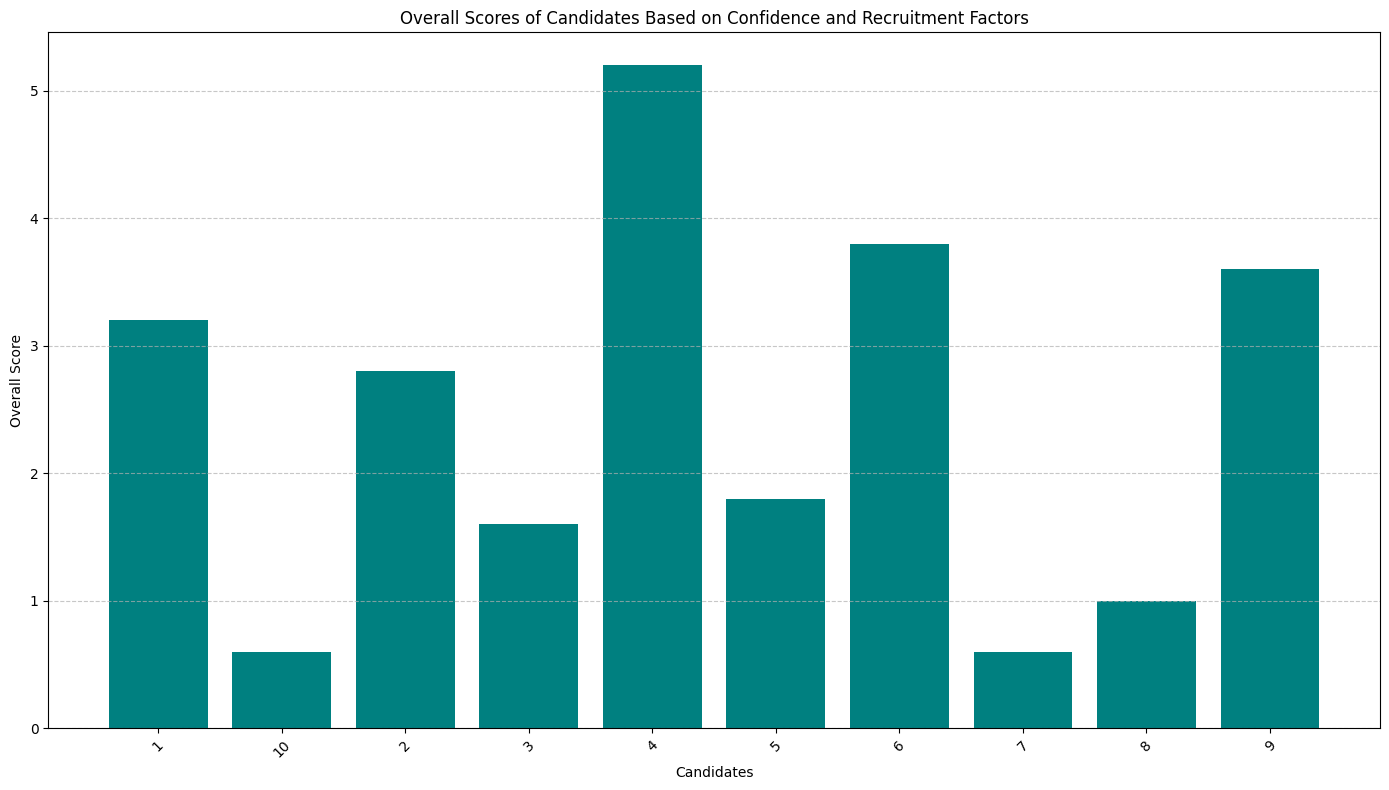

,Candidate,confidence_score,recruitment_score,overall_score
0,1,2,4,3.2
1,10,0,1,0.6
2,2,1,4,2.8
3,3,1,2,1.6
4,4,1,8,5.2
5,5,0,3,1.8
6,6,2,5,3.8
7,7,0,1,0.6
8,8,1,1,1.0
9,9,0,6,3.6


In [27]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Data for confidence and recruitment scores
data = {
    'Candidate': ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9'],
    'confidence_score': [2, 0, 1, 1, 1, 0, 2, 0, 1, 0],
    'recruitment_score': [4, 1, 4, 2, 8, 3, 5, 1, 1, 6]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Define the weightages for each factor
weights = {
    'confidence_score': 0.40,
    'recruitment_score': 0.60
}

# Calculate the overall score for each candidate based on weightages
df['overall_score'] = (
    df['confidence_score'] * weights['confidence_score'] +
    df['recruitment_score'] * weights['recruitment_score']
)

# Plotting the overall scores of each candidate
plt.figure(figsize=(14, 8))
plt.bar(df['Candidate'], df['overall_score'], color='teal')
plt.title('Overall Scores of Candidates Based on Confidence and Recruitment Factors')
plt.xlabel('Candidates')
plt.ylabel('Overall Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the final scores table
df


# overall scores of the candidates

Overall Scores of Candidates:

      Candidate  Overall_Emotion_Score  Transcript_Score  Text_Score  \
0   Candidate 1               5.106690          0.780265         3.2   
1   Candidate 2               0.914179          0.807746         2.8   
2   Candidate 3               6.494754          0.717790         1.6   
3   Candidate 4               7.107944          0.695863         5.2   
4   Candidate 5              12.637020          0.674340         1.8   
5   Candidate 6              12.866817          0.708048         3.8   
6   Candidate 7              13.115082          0.686439         0.6   
7   Candidate 8               0.155103          0.671181         1.0   
8   Candidate 9               9.851756          0.740332         3.6   
9  Candidate 10               6.815372          0.698523         0.6   

   Combined_Score  
0        9.086955  
1        4.521925  
2        8.812544  
3       13.003807  
4       15.111360  
5       17.374865  
6       14.401521  
7        1.82628

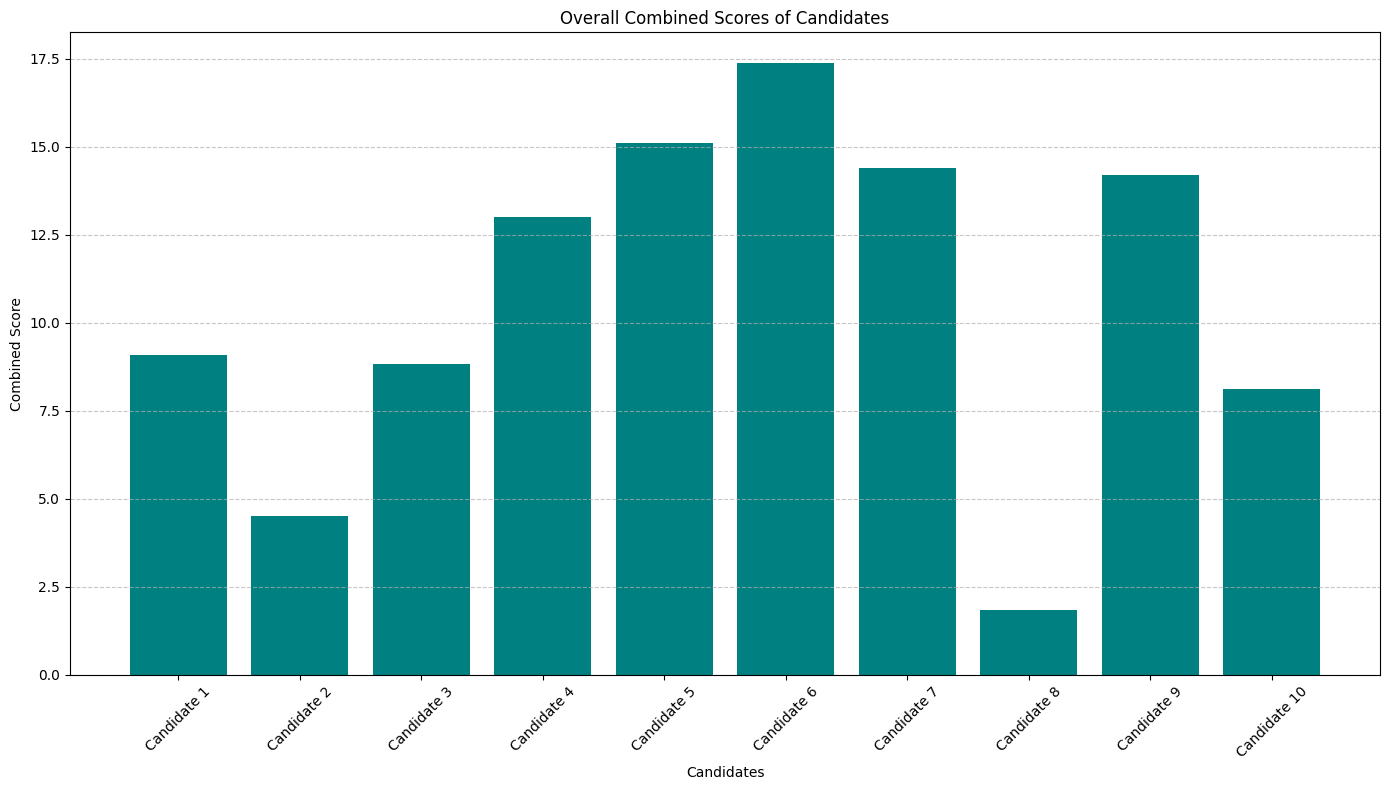

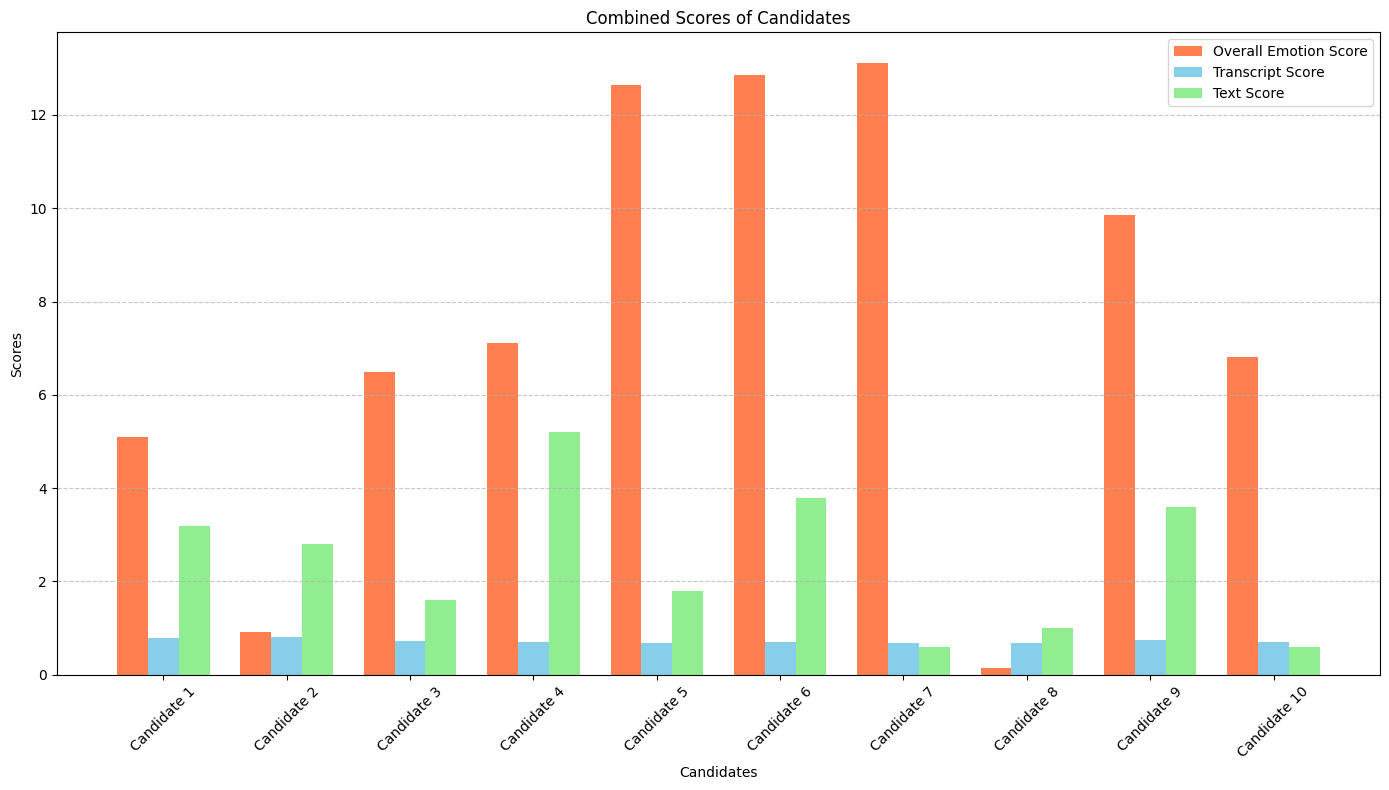

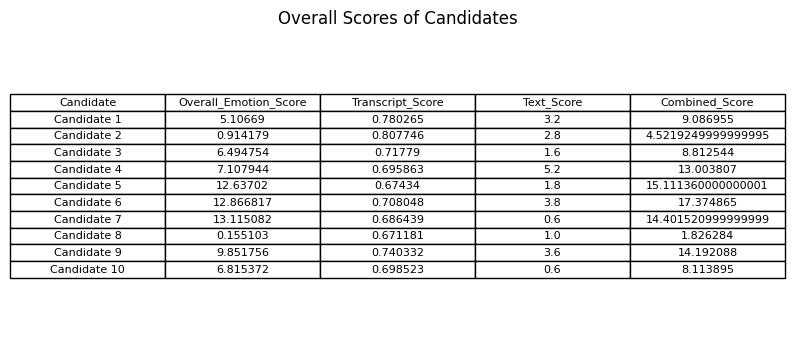

In [36]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Data: Updated overall scores from the three datasets
data = {
    'Candidate': ['Candidate 1', 'Candidate 2', 'Candidate 3', 'Candidate 4', 'Candidate 5', 
                  'Candidate 6', 'Candidate 7', 'Candidate 8', 'Candidate 9', 'Candidate 10'],
    'Overall_Emotion_Score': [5.106690, 0.914179, 6.494754, 7.107944, 12.637020, 
                              12.866817, 13.115082, 0.155103, 9.851756, 6.815372],
    'Transcript_Score': [0.780265, 0.807746, 0.717790, 0.695863, 0.674340, 
                         0.708048, 0.686439, 0.671181, 0.740332, 0.698523],
    'Text_Score': [3.2, 2.8, 1.6, 5.2, 1.8, 
                   3.8, 0.6, 1.0, 3.6, 0.6]
}

# Create a DataFrame with the data
overall_scores = pd.DataFrame(data)

# Calculate the combined overall score by summing up all three scores
overall_scores['Combined_Score'] = overall_scores[['Overall_Emotion_Score', 'Transcript_Score', 'Text_Score']].sum(axis=1)

# Display the DataFrame with overall scores
print("Overall Scores of Candidates:\n")
print(overall_scores)

# Plotting the overall combined scores of each candidate
plt.figure(figsize=(14, 8))
plt.bar(overall_scores['Candidate'], overall_scores['Combined_Score'], color='teal')
plt.title('Overall Combined Scores of Candidates')
plt.xlabel('Candidates')
plt.ylabel('Combined Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting combined graphs for each dataset on the same plot
plt.figure(figsize=(14, 8))

# Set the width of each bar
bar_width = 0.25

# Set positions of the bars on the x-axis
r1 = range(len(overall_scores))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting Overall Emotion Scores
plt.bar(r1, overall_scores['Overall_Emotion_Score'], color='coral', width=bar_width, label='Overall Emotion Score')

# Plotting Transcript Scores
plt.bar(r2, overall_scores['Transcript_Score'], color='skyblue', width=bar_width, label='Transcript Score')

# Plotting Text Scores
plt.bar(r3, overall_scores['Text_Score'], color='lightgreen', width=bar_width, label='Text Score')

# Adding titles and labels
plt.title('Combined Scores of Candidates')
plt.xlabel('Candidates')
plt.ylabel('Scores')
plt.xticks([r + bar_width for r in range(len(overall_scores))], overall_scores['Candidate'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

# Display the table with overall scores using Matplotlib
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the figure size as needed
ax.axis('tight')
ax.axis('off')
ax.table(cellText=overall_scores.values, colLabels=overall_scores.columns, cellLoc='center', loc='center')

plt.title('Overall Scores of Candidates')
plt.show()
